In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import os

In [38]:
#importing and viewing it
data = pd.read_csv("Volumetric_features_regression.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Columns: 141 entries, S.No to dataset
dtypes: float64(122), int64(19)
memory usage: 4.5 MB


S.No  Left-Lateral-Ventricle  Left-Inf-Lat-Vent  \
0     1                 22916.9              982.7   
1     2                 22953.2              984.5   
2     3                 23320.4             1062.1   
3     4                 24360.0             1000.5   
4     5                 25769.4             1124.4   

   Left-Cerebellum-White-Matter  Left-Cerebellum-Cortex  Left-Thalamus  \
0                       15196.7                 55796.4         6855.5   
1                       15289.7                 55778.6         6835.1   
2                       15382.1                 55551.2         7566.0   
3                       14805.4                 54041.8         8004.6   
4                       16331.1                 54108.6         6677.4   

   Left-Caudate  Left-Putamen  Left-Pallidum  3rd-Ventricle  ...  \
0        2956.4        4240.7         2223.9         2034.4  ...   
1        3064.2        4498.6         2354.1         1927.1  ...   
2        3231.7        4456.2         1995.4         2064.7  ...   
3        3137.3        4262.2         1983.4         2017.7  ...   
4        2964.4        4204.6         2409.7         2251.8  ...   

   rh_supramarginal_thickness  rh_frontalpole_thickness  \
0                       2.408                     2.629   
1                       2.417                     2.640   
2                       2.374                     2.601   
3                       2.366                     2.639   
4                       2.381                     2.555   

   rh_temporalpole_thickness  rh_transversetemporal_thickness  \
0                      3.519                            2.009   
1                      3.488                            2.111   
2                      3.342                            2.146   
3                      3.361                            2.056   
4                      3.450                            2.052   

   rh_insula_thickness  rh_MeanThickness_thickness  BrainSegVolNotVent.2  \
0                2.825                     2.33635               1093846   
1                2.720                     2.34202               1099876   
2                2.684                     2.31982               1097999   
3                2.700                     2.29215               1070117   
4                2.574                     2.30397               1075926   

        eTIV.1  Age  dataset  
0  1619602.965   85        1  
1  1624755.130   85        1  
2  1622609.518   86        1  
3  1583854.236   87        1  
4  1617375.362   89        1  

[5 rows x 141 columns]

In [39]:
#dropping columns that has no predictive power -- a heat map was generated previouslt to determine this
data.drop('dataset', axis=1, inplace = True)
data.drop('Left-WM-hypointensities', axis=1, inplace = True) #although not shown, the followinf four led to blank spots...
data.drop('Right-WM-hypointensities', axis=1, inplace = True) #... in the heat map and were thus discarded
data.drop('Left-non-WM-hypointensities', axis=1, inplace = True)
data.drop('Right-non-WM-hypointensities', axis=1, inplace = True)

data.head()

S.No  Left-Lateral-Ventricle  Left-Inf-Lat-Vent  \
0     1                 22916.9              982.7   
1     2                 22953.2              984.5   
2     3                 23320.4             1062.1   
3     4                 24360.0             1000.5   
4     5                 25769.4             1124.4   

   Left-Cerebellum-White-Matter  Left-Cerebellum-Cortex  Left-Thalamus  \
0                       15196.7                 55796.4         6855.5   
1                       15289.7                 55778.6         6835.1   
2                       15382.1                 55551.2         7566.0   
3                       14805.4                 54041.8         8004.6   
4                       16331.1                 54108.6         6677.4   

   Left-Caudate  Left-Putamen  Left-Pallidum  3rd-Ventricle  ...  \
0        2956.4        4240.7         2223.9         2034.4  ...   
1        3064.2        4498.6         2354.1         1927.1  ...   
2        3231.7        4456.2         1995.4         2064.7  ...   
3        3137.3        4262.2         1983.4         2017.7  ...   
4        2964.4        4204.6         2409.7         2251.8  ...   

   rh_superiortemporal_thickness  rh_supramarginal_thickness  \
0                          2.648                       2.408   
1                          2.660                       2.417   
2                          2.597                       2.374   
3                          2.604                       2.366   
4                          2.597                       2.381   

   rh_frontalpole_thickness  rh_temporalpole_thickness  \
0                     2.629                      3.519   
1                     2.640                      3.488   
2                     2.601                      3.342   
3                     2.639                      3.361   
4                     2.555                      3.450   

   rh_transversetemporal_thickness  rh_insula_thickness  \
0                            2.009                2.825   
1                            2.111                2.720   
2                            2.146                2.684   
3                            2.056                2.700   
4                            2.052                2.574   

   rh_MeanThickness_thickness  BrainSegVolNotVent.2       eTIV.1  Age  
0                     2.33635               1093846  1619602.965   85  
1                     2.34202               1099876  1624755.130   85  
2                     2.31982               1097999  1622609.518   86  
3                     2.29215               1070117  1583854.236   87  
4                     2.30397               1075926  1617375.362   89  

[5 rows x 136 columns]

In [40]:
#creating heat map
data.corr()

S.No  Left-Lateral-Ventricle  \
S.No                          1.000000               -0.273051   
Left-Lateral-Ventricle       -0.273051                1.000000   
Left-Inf-Lat-Vent            -0.297935                0.758895   
Left-Cerebellum-White-Matter  0.108163               -0.185344   
Left-Cerebellum-Cortex        0.228461               -0.115200   
...                                ...                     ...   
rh_insula_thickness           0.410412               -0.399022   
rh_MeanThickness_thickness    0.551083               -0.473704   
BrainSegVolNotVent.2          0.241622               -0.143671   
eTIV.1                       -0.012108                0.311918   
Age                          -0.448086                0.569539   

                              Left-Inf-Lat-Vent  Left-Cerebellum-White-Matter  \
S.No                                  -0.297935                      0.108163   
Left-Lateral-Ventricle                 0.758895                     -0.185344   
Left-Inf-Lat-Vent                      1.000000                     -0.185624   
Left-Cerebellum-White-Matter          -0.185624                      1.000000   
Left-Cerebellum-Cortex                -0.114728                      0.453275   
...                                         ...                           ...   
rh_insula_thickness                   -0.388870                      0.196011   
rh_MeanThickness_thickness            -0.460625                      0.228483   
BrainSegVolNotVent.2                  -0.178073                      0.573532   
eTIV.1                                 0.171763                      0.389334   
Age                                    0.496304                     -0.334077   

                              Left-Cerebellum-Cortex  Left-Thalamus  \
S.No                                        0.228461       0.355100   
Left-Lateral-Ventricle                     -0.115200      -0.339383   
Left-Inf-Lat-Vent                          -0.114728      -0.324770   
Left-Cerebellum-White-Matter                0.453275       0.552485   
Left-Cerebellum-Cortex                      1.000000       0.614980   
...                                              ...            ...   
rh_insula_thickness                         0.318206       0.417549   
rh_MeanThickness_thickness                  0.383172       0.520636   
BrainSegVolNotVent.2                        0.738842       0.779632   
eTIV.1                                      0.584460       0.478718   
Age                                        -0.471327      -0.696598   

                              Left-Caudate  Left-Putamen  Left-Pallidum  \
S.No                              0.218686      0.343462       0.213620   
Left-Lateral-Ventricle            0.033166     -0.297033      -0.042405   
Left-Inf-Lat-Vent                -0.000890     -0.270332      -0.100457   
Left-Cerebellum-White-Matter      0.232840      0.363488       0.470753   
Left-Cerebellum-Cortex            0.406568      0.481604       0.453184   
...                                    ...           ...            ...   
rh_insula_thickness               0.219591      0.354311       0.188610   
rh_MeanThickness_thickness        0.329966      0.496941       0.241270   
BrainSegVolNotVent.2              0.511158      0.671049       0.646115   
eTIV.1                            0.445154      0.408873       0.541690   
Age                              -0.316839     -0.596201      -0.283967   

                              3rd-Ventricle  ...  \
S.No                              -0.323219  ...   
Left-Lateral-Ventricle             0.758326  ...   
Left-Inf-Lat-Vent                  0.639533  ...   
Left-Cerebellum-White-Matter      -0.195800  ...   
Left-Cerebellum-Cortex            -0.131148  ...   
...                                     ...  ...   
rh_insula_thickness               -0.389902  ...   
rh_MeanThickness_thickness        -0.507112  ...   
BrainSegVolNotVent.2              -0.159878  .

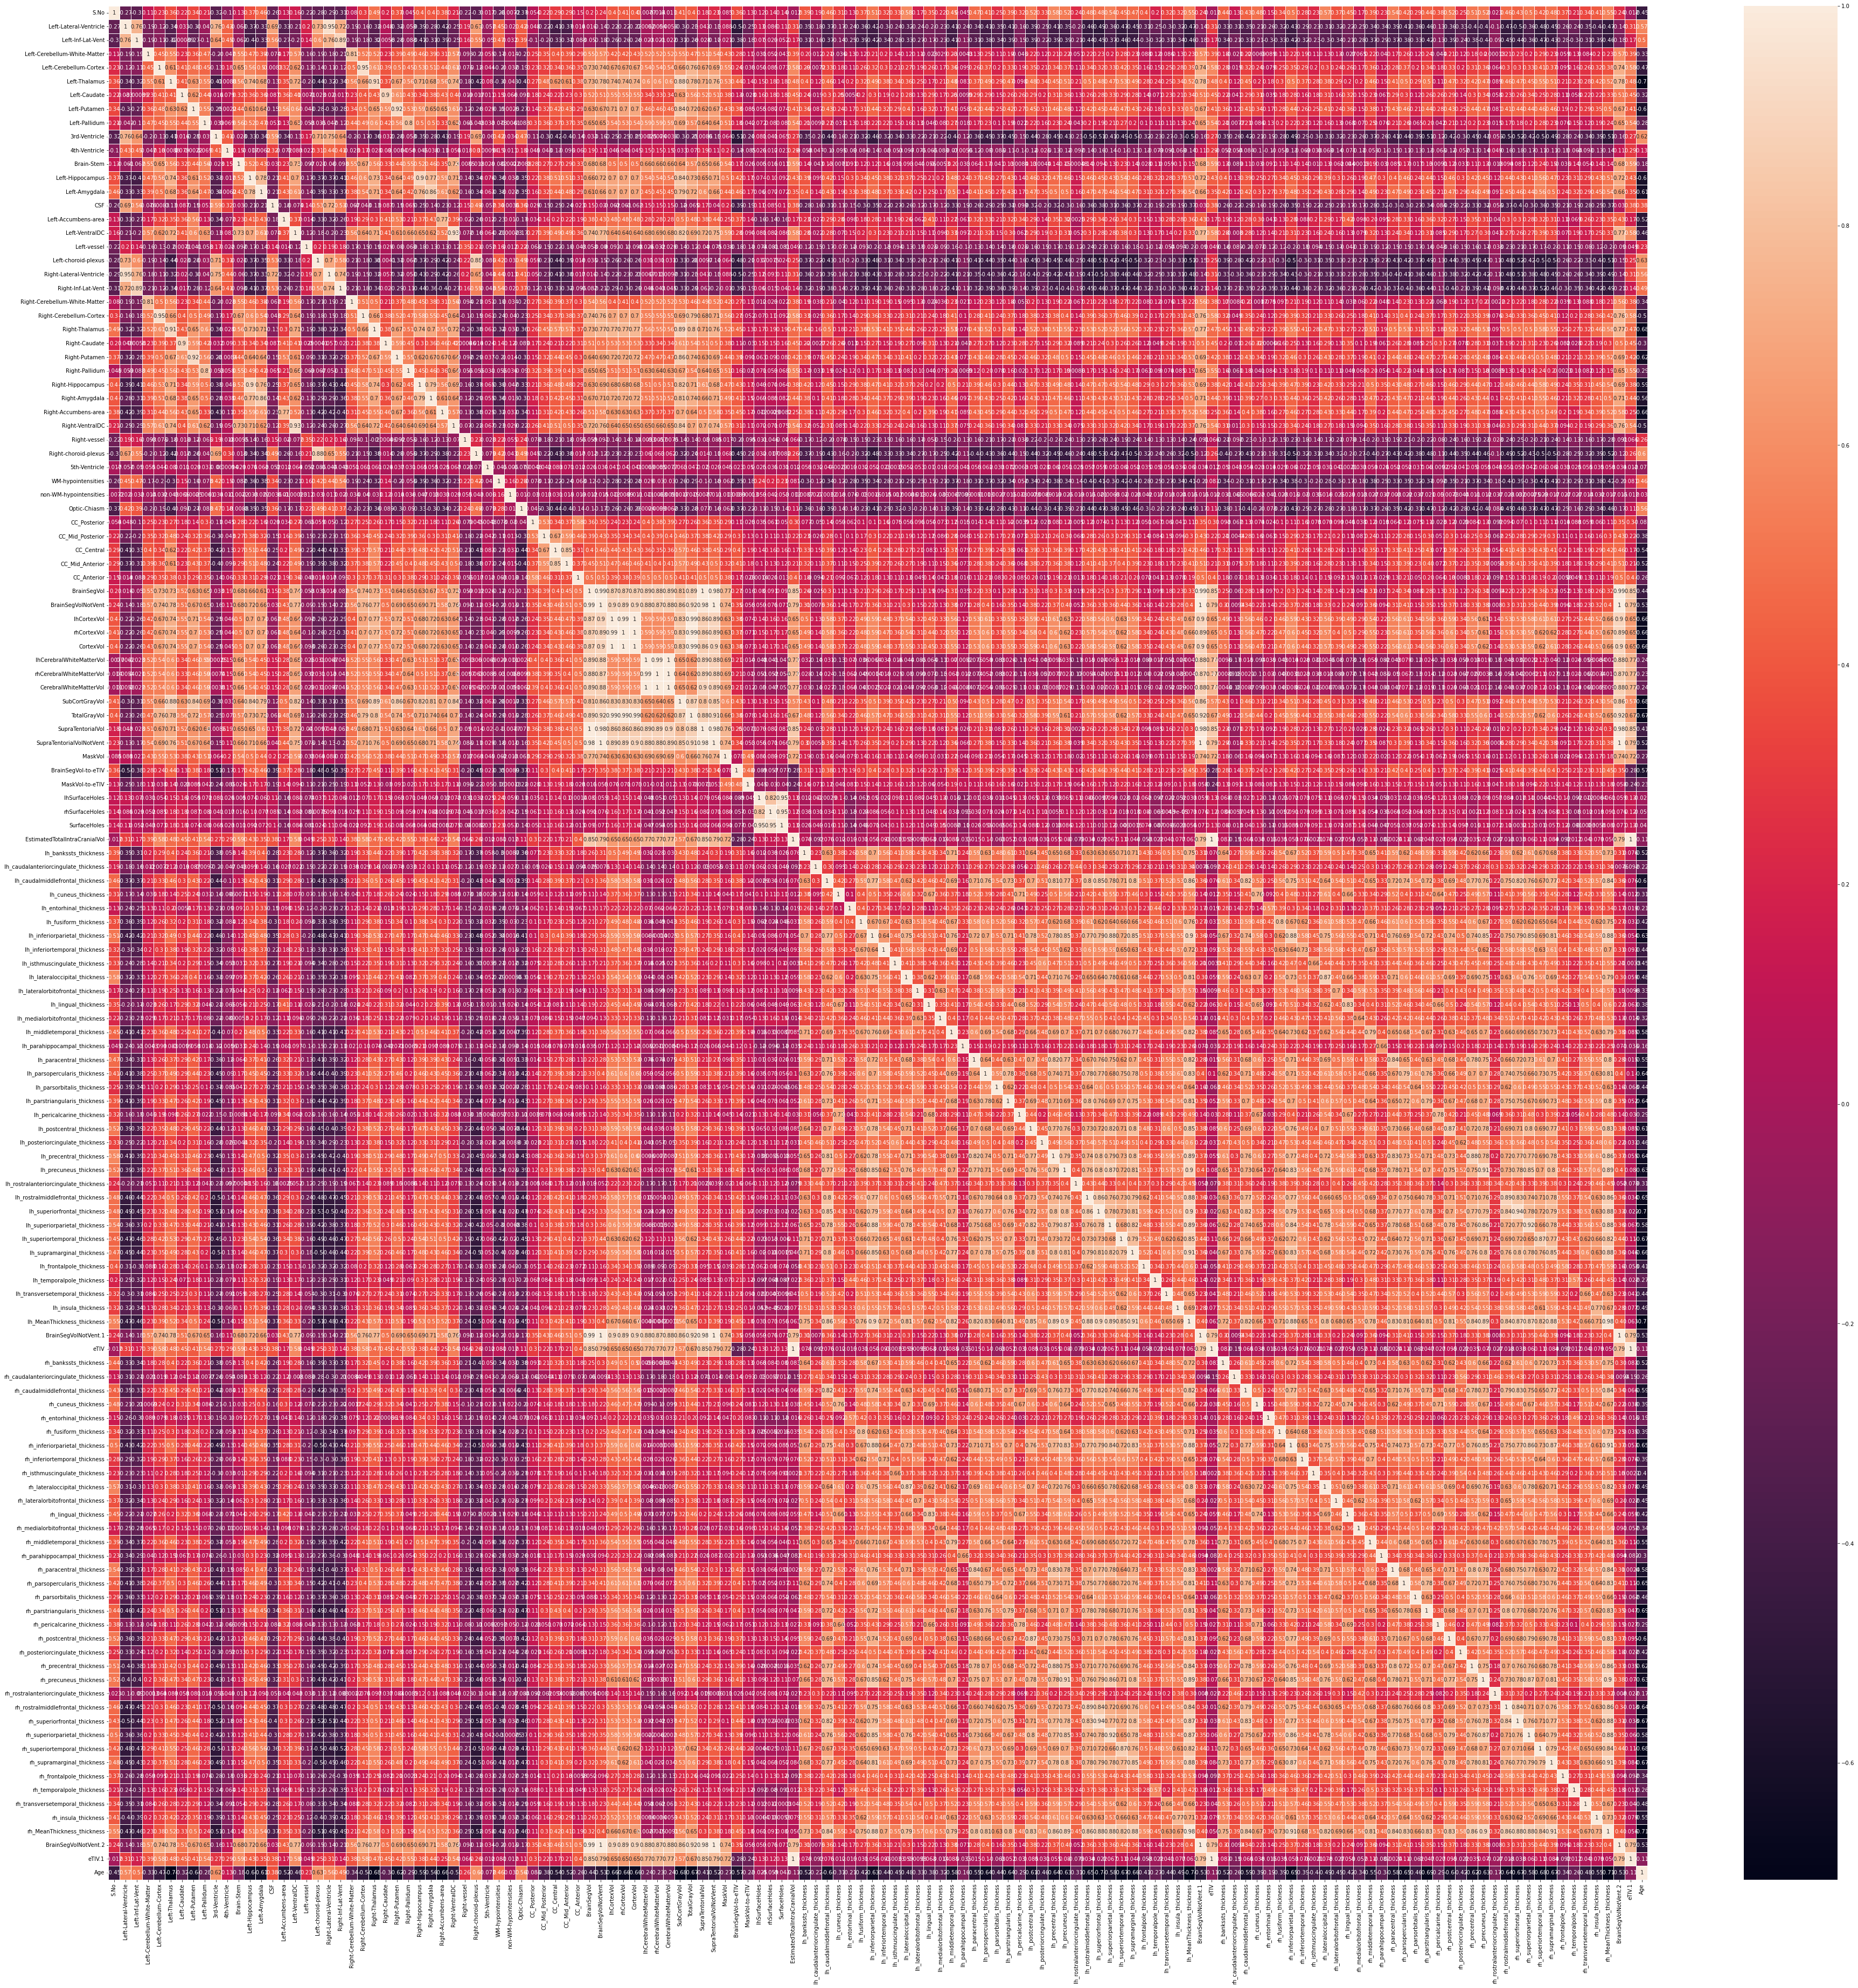

In [25]:
fig, axes = plt.subplots(figsize=(64, 64)) 
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show()

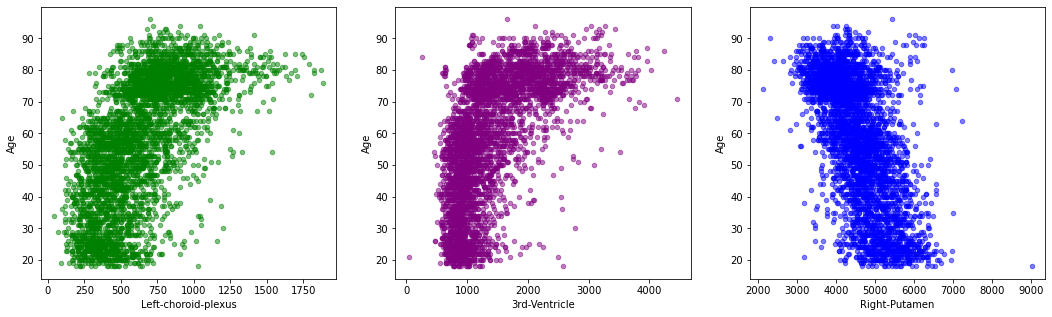

In [35]:
# examples of some corerlations with age - the first two are well correlated, the last one is seen to be not well correlated
#(known from the heat map)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
data.plot(kind='scatter', x='Left-choroid-plexus', y='Age', alpha=0.5, color='green', ax=axes[0])
data.plot(kind='scatter', x='3rd-Ventricle', y='Age', alpha=0.5, color='purple', ax=axes[1])
data.plot(kind='scatter', x='Right-Putamen', y='Age', alpha=0.5, color='blue', ax=axes[2])

plt.show()

In [26]:
#we want to predict age with the brain data, so we set the model up as such
X = data.drop(["Age"], axis=1) 
y = data.Age.values

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)


In [27]:
# REGRESSION 1: Multiple Linear Regression

from sklearn.linear_model import LinearRegression

multiple_linear_reg = LinearRegression(fit_intercept=False)
multiple_linear_reg.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

Training R^2:  0.862544075712073
Testing R^2:  0.8474379135030704
RMSE for Training Data:  7.445444523710654
RMSE for Testing Data:  7.8131955096910835


C:\Users\amyjo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

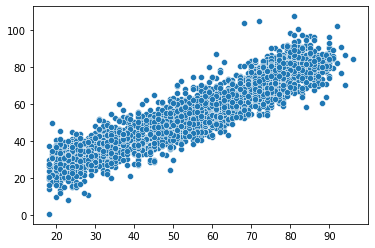

In [50]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation


y_pred_MLR_train = multiple_linear_reg.predict(x_train)
y_pred_MLR_test = multiple_linear_reg.predict(x_test)

r2_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training R^2: ", r2_MLR_train)

r2_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing R^2: ", r2_MLR_test)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

#show scatter of MLR
sns.scatterplot(y_train, y_pred_MLR_train)

Training R^2:  0.7278857192720873
Testing R^2:  0.7152668043293511
RMSE for Training Data:  10.475736550202615
RMSE for Testing Data:  10.673932035402407


C:\Users\amyjo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

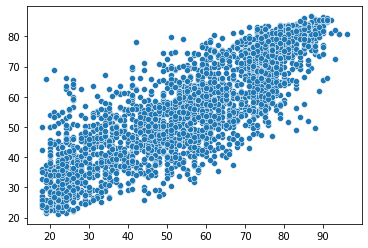

In [52]:
#REGRESSION 2: kNN (k =15) Model >> k was chosen based on guess and check

from sklearn import neighbors

neigh = neighbors.KNeighborsRegressor(n_neighbors = 15)

neigh.fit(x_train, y_train) 
y_pred_test = neigh.predict(x_test) 
y_pred_train = neigh.predict(x_train)

r2_neigh_train = r2_score(y_train, y_pred_train)
print("Training R^2: ", r2_neigh_train)

r2_neigh_test = r2_score(y_test, y_pred_test)
print("Testing R^2: ", r2_neigh_test)

RMSE_neigh_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_neigh_train)

RMSE_neigh_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_neigh_test)

#show scatter for kNN
sns.scatterplot(y_train, y_pred_train)

Training R^2:  0.9294766821937386
Testing R^2:  0.8810528815323307
RMSE for Training Data:  5.333045250459133
RMSE for Testing Data:  6.898939632316605


C:\Users\amyjo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

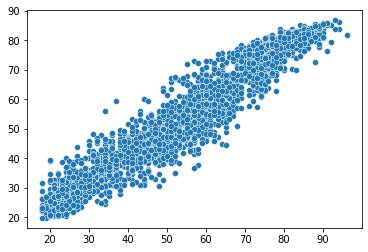

In [55]:
#REGRESSION 3: Boosted Tree Model

from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor(random_state=42)
boost.fit(x_train, y_train)

y_pred_test = boost.predict(x_test)
y_pred_train = boost.predict(x_train)

r2_boost_train = r2_score(y_train, y_pred_train)
print("Training R^2: ", r2_boost_train)

r2_boost_test = r2_score(y_test, y_pred_test)
print("Testing R^2: ", r2_boost_test)

RMSE_boost_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_boost_train)

RMSE_boost_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_boost_test)

#Show scatter for boosted tree
sns.scatterplot(y_train, y_pred_train)

#mean absolute error
#adjusted R^2